## 케라스에서 MNIST 데이터셋 적재하기

In [39]:
from keras.datasets import mnist
# (훈련 세트), (테스트 세트)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
# 훈련 데이터 살펴보기
print("train_images:",train_images.shape)
print("train_labels:",train_labels)
print("length of train_labels:",len(train_labels))

train_images: (60000, 28, 28)
train_labels: [5 0 4 ... 5 6 8]
length of train_labels: 60000


In [3]:
# 테스트 데이터 살펴보기
print("test_images:",test_images.shape)
print("test_labels:",test_labels)
print("length of test_labels:",len(test_labels))

test_images: (10000, 28, 28)
test_labels: [7 2 1 ... 4 5 6]
length of test_labels: 10000


## 2-2 신경망 구조

In [4]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))  # Dense층 : fully-connected 완전 연결, 조밀하게 연결
network.add(layers.Dense(10,activation='softmax'))                       # 10개의 확률 점수가 들어있는 배열을 반환하는 소프트맥스 층

## 2-3 컴파일 단계
신경망이 훈련 준비를 마치기 위해서 컴파일 단계에 포함될 세 가지
- loss function: 옳은 방향으로 학습할 수 있게 해줌
- optimizer: 데이터와 loss function을 이용해 네트워크를 업데이트하는 메커니즘
- metrics: 훈련과 테스트 과정을 모니터링할 지표

In [6]:
network.compile(optimizer='rmsprop',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

## 2-4 이미지 데이터 준비하기
- 데이터를 네트워크에 맞는 크기로 바꾼다 
- 모든 값을 0과 1 사이로 스케일 조정 (신경망은 입력값의 스케일에 민감하다)

In [ ]:
train_images1 = train_images.reshape(60000,28*28)

(60000, 784)

In [12]:
train_images = train_images.reshape((60000,28*28)) # 왜 괄호가 이중으로?
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [15]:
print('괄호 한개:',train_images1.shape)
print('괄호 두개:',train_images.shape)

괄호 한개: (60000, 784)
괄호 두개: (60000, 784)


## 2-5 레이블 준비하기
- 레이블을 범주형으로 인코딩
- 훈련데이터의 개수 n, 클래스의 개수 k ->  입력받은 n에 대해 (n,k)의 정수 배열로 변경

In [16]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## 훈련하기

In [18]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 1.4767 - accuracy: 0.6896
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5851 - accuracy: 0.8530
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4112 - accuracy: 0.8885
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3528 - accuracy: 0.9009
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3236 - accuracy: 0.9076


## 테스트하기

In [21]:
test_loss, test_acc = network.evaluate(test_images,test_labels)
print('test_acc:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 54.1648 - accuracy: 0.8208
test_acc: 0.8208000063896179


In [35]:
digit.

(784,)

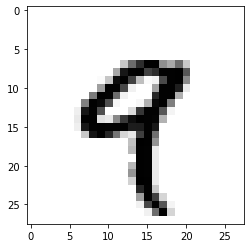

In [37]:
## 2-6 다선 번째 이미지 출력하기
digit = train_images[4].reshape(28,28)
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

# 신경망을 위한 데이터 표현

## 텐서란?

### 스칼라 텐서

In [22]:
import numpy as np
x = np.array(12)

In [23]:
x

array(12)

In [24]:
x.ndim

0

### 벡터 (1D 텐서)

In [25]:
x = np.array([12,3,6,14,7])   # 원소 5개 == 5차원 벡터, 5차원 텐서와 착각 x
x

array([12,  3,  6, 14,  7])

In [26]:
x.ndim

1

### Matrix, 행렬 (2D 텐서)

In [27]:
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [28]:
x.ndim

2

### 3D 텐서와 고차원 텐서

In [29]:
x = np.array([[[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]],
              [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [30]:
x.ndim

3

## 넘파이로 텐서 조작하기

In [40]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [41]:
my_slice = train_images[10:100,:,:]
print(my_slice.shape)

(90, 28, 28)


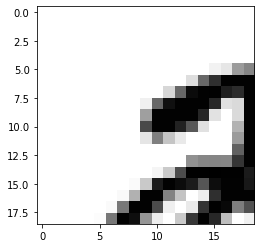

In [42]:
# 그냥 한번 잘라봄 ㅎㅎ
y = train_images[5,:19,:19]
plt.imshow(y, cmap = plt.cm.binary)
plt.show()

## 배치 데이터
- 첫번째 축, 샘플 축, 샘플 차원

## 텐서의 실제 사례
- 벡터: 2D 텐서 (samples, features)
- 시계열 데이터 or 시퀀스 데이터: 3D 텐서 (samples, timesteps, features)
- 이미지, 텐서: 4D 텐서 (samples, height, width, channels) or (samples, channels, height, width)
- 동영상: 5D 텐서 (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width)

### 벡터 데이터
- (샘플 축, 특성 축)

### 시계열 데이터 또는 시퀀스 데이터
(샘플, 타임스텝, 특성)
- 주식 가격 데이터셋: (일, 시간, 값)
- 트윗 데이터셋: (samples, 문자 시퀀스, 알파벳)

### 이미지 데이터
(샘플, 채널, 너비, 높이) or (샘플, 너비, 높이, 채널)

### 비디오 데이터
(샘플, 프레임, 채널, 너비, 높이)

# 텐서 연산

In [43]:
keras.layers.Dense(512,acitvation='relu')
output = relu(dot(W, input) + b)
dot은 w와 input의 점곱
b를 더한다
relu(x) max(x,0) # 0보다 크면 x를, 0보다 작으면 0을 리턴

NameError: ignored

## 원소별 연산

In [ ]:
def naive_relu(x):
  assert len(x.shape) == 2: # 입력값의 차원이 2D가 아니면 안 됨 ,if면 오류가 안 나므로 무조건 2D가 오게끔 한다.

  x = x.copy()
  for i in range(x.shape[0]):   # samples 개수만큼
    for j in range(x.shape[1]): # feature들에 대해 
      x[i,j] = max(x[i,j],0)    # relu 시전
  return x

In [ ]:
def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape==y.shape

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x

## 브로드캐스팅
- 크기가 다른 두 텐서를 계산할 때, 작은 텐서를 큰 텐서의 크기에 맞춘다.
- 브로드캐스팅 축을 추가하고, 큰 텐서 크기에 맞게 반복됨

In [45]:
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2             # [[1,2,3,4,5],[1,2,3,4,5]]
  assert len(y.shape) == 1             # [1,2,3,4,5]
  assert x.shape[1] == y.shape[0]   # 매트릭스의 feture 개수가 벡터의 feature 개수만큼 있나 확인

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x

In [50]:
import numpy as np

x = np.random.random((64,3,32,10))
y = np.random.random((32,10))

z = np.maximum(x,y)
z.shape

(64, 3, 32, 10)

In [52]:
# 벡터x, 벡터 y의 점곱
def naive_vector_dot(x,y):
  assert len(x.shape) == 1
  assert len(x.shape) == 1
  assert x.shape[0] == y.shape[0]

  z = 0.
  for i in range(x.shape[0]):
    z += x[i] *j[i]
  return z

In [54]:
# 행렬 x와 벡터 y의 곱
def naive_matrix_vector_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i,j]*y[i]
  return z

In [ ]:
# 행렬 벡터 점곱 
def naive_matrix_vector_dot(x,y):
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i,:],y)
  return z

In [55]:
# 
def naive_matrix_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]  #  행렬의 곱 (a * b) * (c * d) 에서 b와 c가 같아야 한다는 말

  z = np.zeros((x.shape[0],y.shape[1]))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i,:]
      column_y = y[:,j]
      z[i,j] = naive_vector_dot(row_x,column_y)
  return z

## 텐서 크기 변환
- reshape
- transpose(전치)

In [56]:
x = np.array([[0.,1.],
              [2.,3.],
              [4.,5.]])

In [57]:
print(x.shape)

(3, 2)


In [58]:
x = x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [60]:
x = x.reshape(2,3)
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [62]:
x = np.zeros((300,20))
x.shape

(300, 20)

In [63]:
x = np.transpose(x)
print(x.shape)

(20, 300)


## 텐서 연산의 기하학적 해석
- theta각도 웅앵웅
- 아핀 변환 웅앵웅

## 딥러닝의 기하학적 해석
- 매니폴드 웅앵웅

## 신경망의 엔진: 그래디언트 기반 최적화
- W,b : 가중치, 훈련되는 파라미터 (각각 kernel, bias라는 이름으로도 불림)
- 무작위 초기화: 초기에는 가중치 행렬이 작은 난수로 채워져 있음 (의미 없는 표현)
- 훈련이 계속되면서가중치가 점진적으로 조정 또는 훈련

값을 넣고 돌리고 오차를 계산하면 비효율적이므로 미분 가능하다는 점을 활용하여 손실의 그래디언트를 계산한다.

### 변화율

In [ ]:
# x: 입력 벡터
# W:
# y:

y_pred = dot(W,x)
loss_value = loss(y_pred, y)
loss_value = f(W)
